<a href="https://colab.research.google.com/github/Aditya-11/Eron-Email-Analysis/blob/aditya/python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title
import pandas as pd

import os 
"""
mypath = os.path.dirname(os.path.realpath('python-project.ipyb'))

print(mypath)

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

print(onlyfiles)
"""

/content
[]


In [0]:
import pandas as pd

url = 'https://drive.google.com/file/d/1fan6XhI_vvkkF-xakP1i2EY6W0w6xNKf/view?usp=sharing'

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


id = '1fan6XhI_vvkkF-xakP1i2EY6W0w6xNKf'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data.csv')  

df3 = pd.read_csv('data.csv')


#df1 = pd.read_csv(url)


In [0]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [0]:
import pandas as pd

df3 = pd.read_csv('data.csv')

data_top = df3.head()  

print(list(data_top))

#print (df3.iloc[2]['Sender'])

print (df3.iloc[2:10]['Subject'])

print (df3.iloc[2:10]['Date'])


print (df3.shape)

#print(df3.describe())


['Sender', 'Receiver', 'Subject', 'Date', 'Message body']
2                                                 test
3                                                  NaN
4                                                Hello
5                                                Hello
6                                                  NaN
7                             PRC review - phone calls
8                           High Speed Internet Access
9    fixed forward or other Collar floor gas price ...
Name: Subject, dtype: object
2    2000-10-18 03:00:00-07:00
3    2000-10-23 06:13:00-07:00
4    2000-08-31 05:07:00-07:00
5    2000-08-31 04:17:00-07:00
6    2000-08-22 07:44:00-07:00
7    2000-07-14 06:59:00-07:00
8    2000-10-17 02:26:00-07:00
9    2000-10-16 06:44:00-07:00
Name: Date, dtype: object
(517401, 5)


In [104]:

#graphs no of emails send vs month/year/day

import datetime
import pandas as pd

df3 = pd.read_csv('data.csv')
 

year = []
month = []
day = []
day_week = []

num = df3.shape[0]

for i in range(50000):
  l1 = df3.iloc[i]['Date']
  try:
    l2 = l1.split('-')
    l3 = l2[2].split(' ')
    today = datetime.datetime(int(l2[0]), int(l2[1]), int(l3[0]))
    year.append(int(l2[0]))
    month.append(int(l2[1]))
    day.append(int(l3[0]))
    day_week.append(today.weekday())

  except:
    pass
print(len(day),len(month),len(year),len(day_week))

df1 = df3[0:len(day)]

try:
  df1['Day'] = day
  df1['Month'] = month
  df1['Year'] = year
  df1['Day_week'] = day_week
except Error as e:
  print(e)

print(df1.iloc[1])



47060 47060 47060 47060
Sender                                              phillip.allen
Receiver                                            john.lavorato
Subject                                                       NaN
Date                                    2001-05-04 13:51:00-07:00
Message body    Traveling to have a business meeting takes the...
Day                                                             4
Month                                                           5
Year                                                         2001
Day_week                                                        4
Name: 1, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

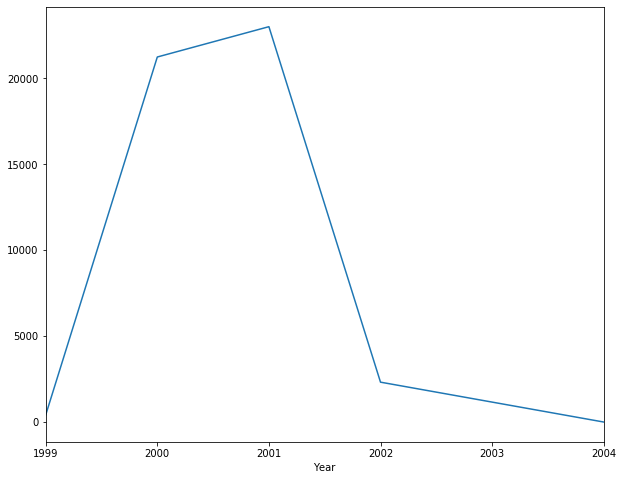

In [105]:
# Year 


import matplotlib.pyplot as plt

indices = (df1['Year'] > 1995) & (df1['Year']<= 2004)

plt.figure(figsize = (10,8))

figure1 = df1.loc[indices].groupby('Year')['Sender'].count().plot()


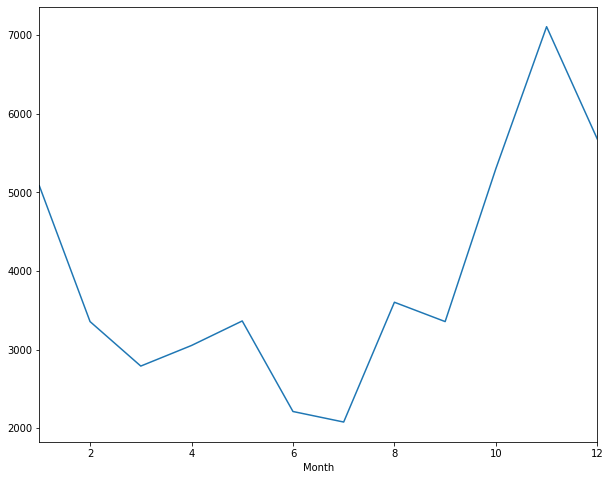

In [106]:
#Month


plt.figure(figsize = (10,8))

figure1 = df1.loc[indices].groupby('Month')['Sender'].count().plot()

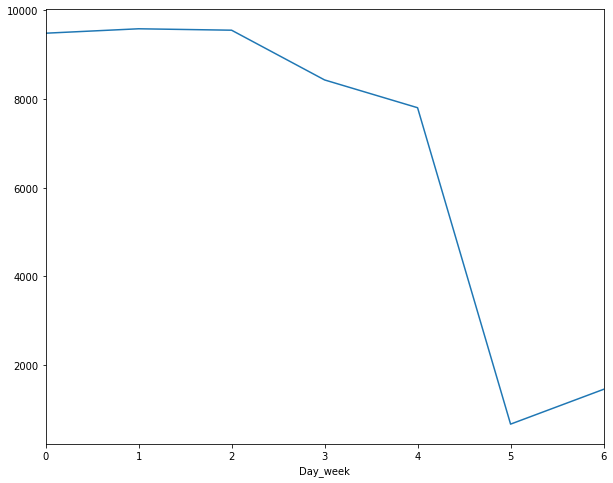

In [107]:
# Day_week


plt.figure(figsize = (10,8))

figure1 = df1.loc[indices].groupby('Day_week')['Sender'].count().plot()


In [0]:
# top 10 frequent user (Sender or Receiver)

import numpy as np

import itertools

hash1 = {}

for i in range(len(day)):
  if df1.iloc[i]['Sender'] in hash1:
    hash1[df1.iloc[i]['Sender']] += 1
  else :
    hash1[df1.iloc[i]['Sender']] = 0
  if df1.iloc[i]['Receiver'] in hash1:
    hash1[df1.iloc[i]['Receiver']]+= 1
  else :
    hash1[df1.iloc[i]['Receiver']] = 0

hash1 = dict(sorted(hash1.items(), key=lambda kv: kv[1], reverse=True))

#print(hash1)

n_items = list(itertools.islice(hash1.items(),10))

name = []
emails = []

for i in n_items:
  name.append(i[0])
  emails.append(int(i[1]))


y_pos = np.arange(len(name))

  


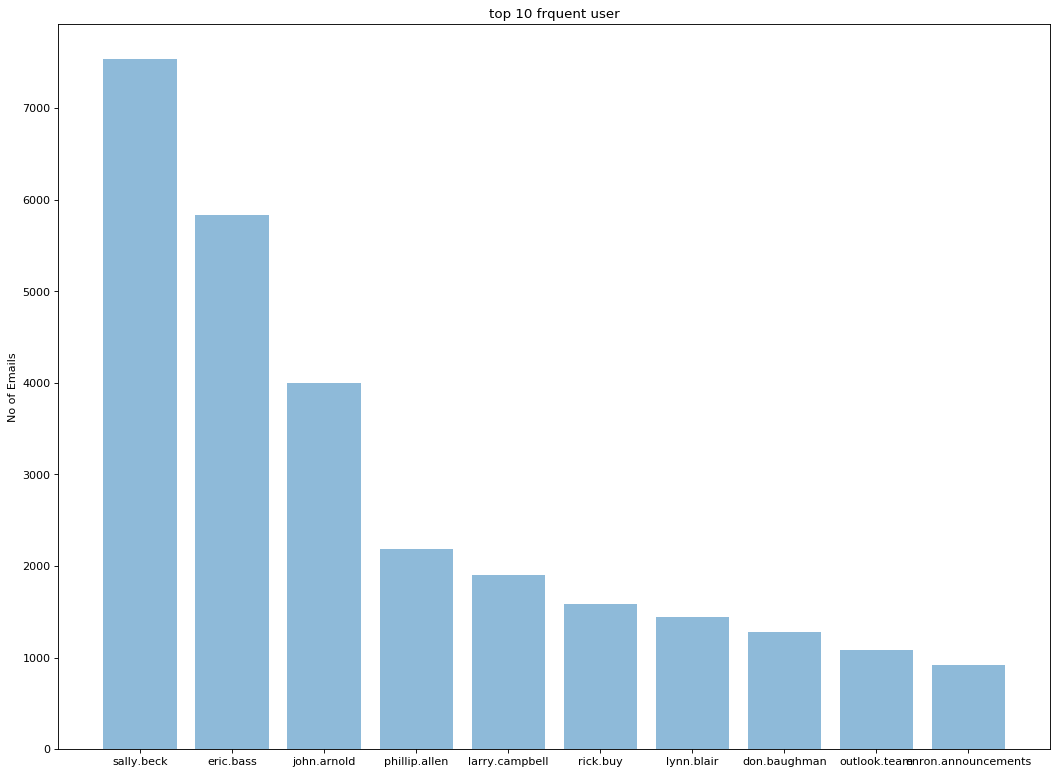

In [110]:
# frequent user plot
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

plt.bar(y_pos, emails, align='center', alpha=0.5)
plt.xticks(y_pos, name)
plt.ylabel('No of Emails')
plt.title('top 10 frquent user')

#plt.figure(figsize = (10,8))

plt.show()


In [95]:
# find Users and number of emails they sent by year




Sender               Year
'todd'.delahoussaye  2001     1
1.10969419.-18       2001     2
1.10969419.-2        2001    11
1.10969419.-3        2001     2
1.11913372.-2        2000     1
                             ..
your_online_account  2001     1
zachary.streight     2000     1
zarin.imam           2000     4
                     2001     3
zhiyong.wei          2000     1
Name: Receiver, Length: 2605, dtype: int64

In [112]:
# Check whether emails were to a single person or multiple people


def direct(name_1 , no):
  l1 = []
  for i in range(20000):
    if ((df1.iloc[i]['Receiver'] not in l1)  and (df1.iloc[i]['Sender'] == name_1)):
      l1.append(df1.iloc[i]['Receiver'])

  if (len(l1) <= 2):
    print(name_1,"Direct",no)
  else:
    print(name_1,"Non-Direct",no)


for i in name:
  direct(i,hash1[i])


sally.beck Direct 7538
eric.bass Non-Direct 5839
john.arnold Non-Direct 3996
phillip.allen Non-Direct 2184
larry.campbell Non-Direct 1902
rick.buy Direct 1582
lynn.blair Direct 1449
don.baughman Non-Direct 1278
outlook.team Direct 1084
enron.announcements Non-Direct 916
